/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(
/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


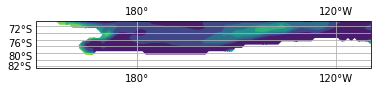

sea_ice_area_fraction / (%)         (scalar cube)
    Scalar coordinates:
        latitude                    -72.5 degrees, bound=(-73.0, -72.0) degrees
        longitude                   -160.0 degrees, bound=(-211.0, -109.0) degrees
        time                        2015-01-16 12:00:00, bound=(2015-01-01 00:00:00, 2015-02-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
        mean                        longitude
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-03-18T13:44:33Z
        data_sp

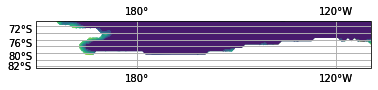

sea_ice_area_fraction / (%)         (scalar cube)
    Scalar coordinates:
        latitude                    -72.5 degrees, bound=(-73.0, -72.0) degrees
        longitude                   -160.0 degrees, bound=(-211.0, -109.0) degrees
        time                        2015-02-15 00:00:00, bound=(2015-02-01 00:00:00, 2015-03-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
        mean                        longitude
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-03-18T13:44:33Z
        data_sp

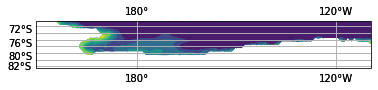

sea_ice_area_fraction / (%)         (scalar cube)
    Scalar coordinates:
        latitude                    -72.5 degrees, bound=(-73.0, -72.0) degrees
        longitude                   -160.0 degrees, bound=(-211.0, -109.0) degrees
        time                        2015-03-16 12:00:00, bound=(2015-03-01 00:00:00, 2015-04-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
        mean                        longitude
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-03-18T13:44:33Z
        data_sp

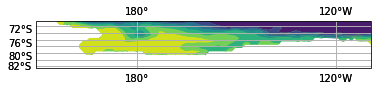

sea_ice_area_fraction / (%)         (scalar cube)
    Scalar coordinates:
        latitude                    -72.5 degrees, bound=(-73.0, -72.0) degrees
        longitude                   -160.0 degrees, bound=(-211.0, -109.0) degrees
        time                        2015-04-16 00:00:00, bound=(2015-04-01 00:00:00, 2015-05-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
        mean                        longitude
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-03-18T13:44:33Z
        data_sp

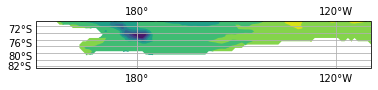

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [29]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

fname = '/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_script/siconc_SImon_GFDL-CM4_ssp585_r1i1p1f1_gr_201501-210012.nc'
cube = iris.load(fname)
cube2=cube[2]

#add_month_number(siconc, 'time', name='month_number2')
#cube2 = siconc[np.where((siconc.coord('month_number2').points == 12))]
#then to average this by each year, so that you have the December-Jan for
#add_season_year(cube2, 'time', name='season_year')
#then average by the season year:
#cube2.aggregated_by(['season_year'], iris.analysis.MEAN)

fgname = ('/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/fgco2_files/fgco2_picontrol/outfile')
fgcube = iris.load(fgname)
fgcube2 = fgcube[2]


#extract Jan and Dec to average the sea ice concentration across these mon
#add_month_number(fgcube1, 'time', name='month_number1')
#fgcube2 = fgcube1[np.where((fgcube1.coord('month_number1').points == 12))]
#then to average this by each year, so that you have the December-Jan for
#add_season_year(fgcube2, 'time', name='season_year')
#then average by the season year:
#fgcube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube2 is therefore the data per season

#start of the loop
for i in range (0,2101-2015):
    cube3=cube2[i,:,:]
    west = -210 
    east = -110 
    south = -82 
    north = -69
    temporary_cube = cube3.intersection(longitude = (west, east)) 
    regional_cube = temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    my_plot = iplt.contourf(regional_cube)
    plt.gca().gridlines(draw_labels=True)
    plt.show()
    
    fgcube3=fgcube2[i,:,:]

    fg_temporary_cube = fgcube3.intersection(longitude = (west, east)) 
    fg_regional_cube = fg_temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    my_plot = iplt.contourf(fg_regional_cube)
    plt.gca().gridlines(draw_labels=True)
    #print(fgcube3.coord('time'))
    #plt.show()

#extract the latitude I want to work with
    #north_edge = regional_cube.collapsed('latitude', iris.analysis.MEAN)
    #average across this latitude
    #nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
    #print(nE_mean.data)
    #latitude = -72,-72.5,-73,-73.5,-74,-74.5,-75
    #grid_areas = area_weights(regional_cube)
    #average_variable = regional_cube.collapsed(['latitude', 'longitude'],MEAN,weights=grid_areas)
    #print(average_variable.data)
    
    north_edge = regional_cube.extract(iris.Constraint(latitude=-72))
    #average across this latitude
    nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
    print(nE_mean)
 
    if nE_mean.data >=55:
        #define siconc for polynya
        polynya_threshold=regional_cube.data
        polynya = np.where((polynya_threshold.data <=10) & (nE_mean.data >=55))
        #print(polynya)
        polynya = polynya_threshold.data
        #plt.pcolormesh(polynya_threshold.data,vmin=0,vmax=100)
        plt.show()

        #define a variable to hold the threshold number you are interested in
        polynya_threshold_value = 30.0
        #Take a copy of the seaice data that we are going to use to make a binary 'mask' showing presence of absense of polynyas as 1s and 0s
        polynya_location = polynya_threshold.data.copy()
        #set that land data in this mask to nan (Not a number) so we don;t get confused (these will show up white in a typical plot)
        polynya_location[np.where(polynya_location >= 1.0e9)] = np.nan
        #make water that has more ice than our polynia condition equal to zero.
        polynya_location[np.where((polynya_location <= 100.0) & (polynya_location > polynya_threshold_value))] = 0.0
        #make water that has less ice than our polynia condition equal to zero to make where the polynya is
        polynya_location[np.where((polynya_location > 0.0) & (polynya_location <= polynya_threshold_value))] = 1.0
        #plot this data
        
        polynya_location_cube_data[i,:,:] = polynya_location
        
        #plot this data
        plt.pcolormesh(polynya_location,vmin=0,vmax=1)
        
        plt.show()
        
#Put th polynia data array nack in to the cube wich holds al o fteh metadata etc.
polynya_location_cube.data = polynya_location_cube_data
        
        #Note in this 1st situation, we have not tested to make sure the northern edge has >30% seaice and it has not, so it is eroniously identify
        
        
        #total_temporary_cube = fg_regional_cube.intersection(longitude = (west, east)) 
        #total_regional_cube = total_temporary_cube.intersection(latitude = (south, north))
        #ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
        #qplt.pcolormesh(polynya_location.data * fg_regional_cube)

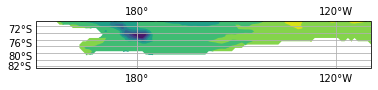

In [30]:
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) 
my_plot = iplt.contourf(fg_regional_cube)
plt.gca().gridlines(draw_labels=True)

NameError: name 'polynya_location_cube' is not defined

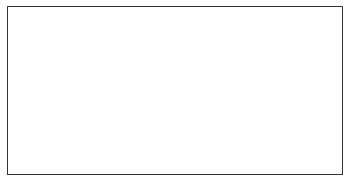

In [31]:
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
my_plot = iplt.contourf(polynya_location_cube)
plt.gca().gridlines(draw_labels=True)

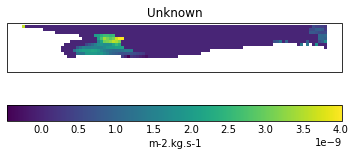

In [90]:
cube_result = polynya_location.data * fg_regional_cube
total_temporary_cube = cube_result.intersection(longitude = (west, east)) 
total_regional_cube = total_temporary_cube.intersection(latitude = (south, north))
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
qplt.pcolormesh(cube_result)

In [94]:
for i in zip(0,2101-2015):
    polynya = polynya_location.data[i,:]
    fg = fg_regional_cube[i,:]

    cube_result = polynya * fg
    
    qplt.pcolormesh(cube_result)

TypeError: 'int' object is not iterable

In [95]:
for i, j in zip(0,2101-2015):
    cube_result = polynya_location.data[i,:] * fg_regional_cube[j,:]
    total_temporary_cube = cube_result.intersection(longitude = (west, east)) 
    total_regional_cube = total_temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    qplt.pcolormesh(cube_result)



TypeError: 'int' object is not iterable

ValueError: Cube must be 2-dimensional. Got 1 dimensions.

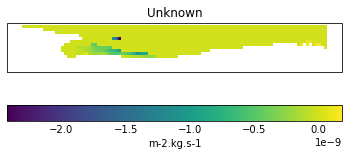

In [13]:
cube_result = polynya_location.data * fg_regional_cube
total_temporary_cube = cube_result.intersection(longitude = (west, east)) 
total_regional_cube = total_temporary_cube.intersection(latitude = (south, north))
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
qplt.pcolormesh(cube_result)

for i in range(0,2101-2015):
    qplt.pcolormesh(cube_result[i])

